In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_moons
dataset = make_moons(n_samples = 1000,
                     noise = 0.5,
                     random_state = 0)
dataset = pd.DataFrame(np.hstack((dataset[0], dataset[1].reshape(-1,1))),
                      columns = ['x1','x2', 'y'])
dataset

,x1,x2,y
0,2.216430,0.741684,1.0
1,2.057427,0.424853,1.0
2,-0.116847,0.004159,0.0
3,-0.710797,0.210482,1.0
4,0.267548,-0.460654,1.0
...,...,...,...
995,1.692373,0.754857,1.0
996,0.147087,1.050647,0.0
997,0.442926,-1.251910,1.0
998,0.361921,-0.049817,1.0


In [3]:
dataset.y.value_counts()

y
1.0    500
0.0    500
Name: count, dtype: int64

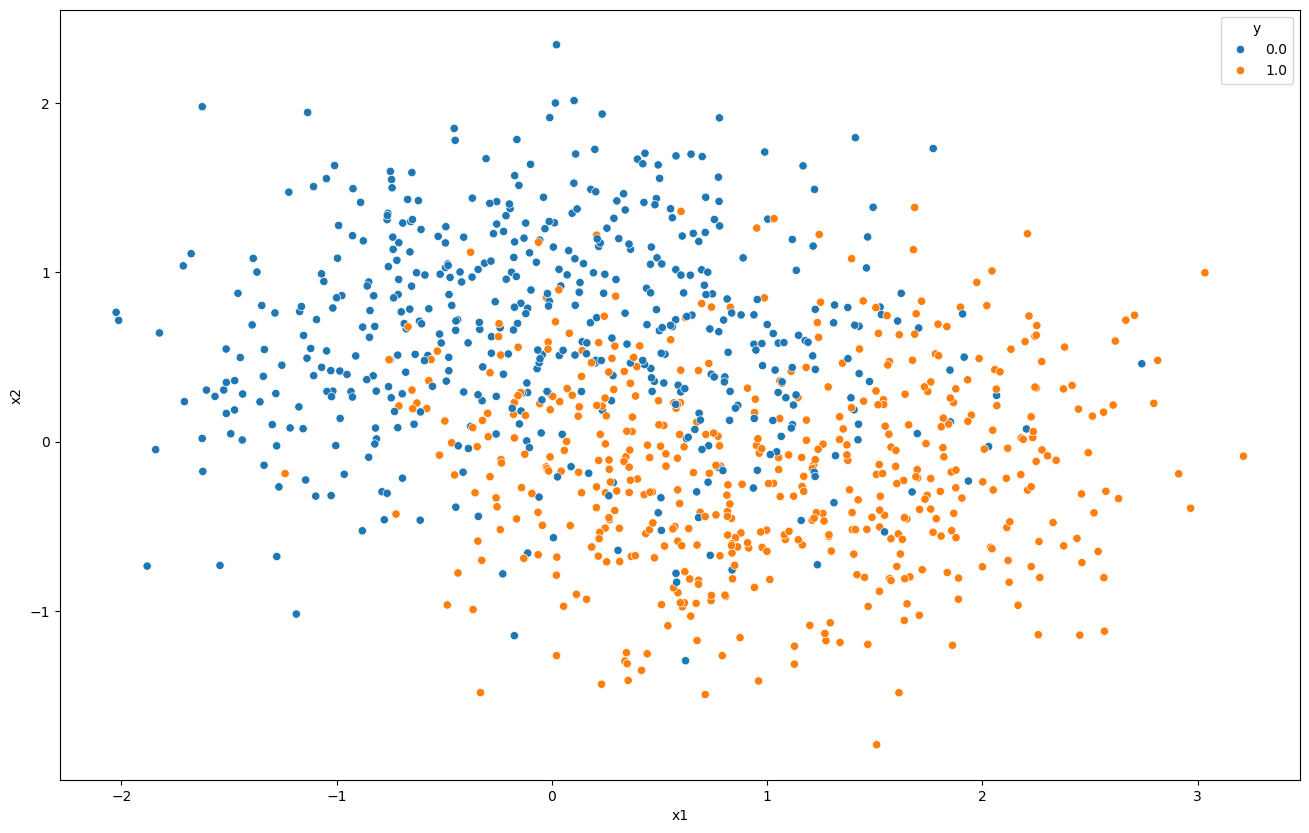

In [4]:
fig = plt.figure()
fig.set_size_inches(16,10)

sns.scatterplot(x = dataset['x1'], y = dataset['x2'], hue = dataset['y'])

plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier
X = dataset.drop('y', axis = 1)
Y = dataset['y']
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X,Y)

DecisionTreeClassifier()

In [6]:
decision_tree.score(X, Y)

1.0

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


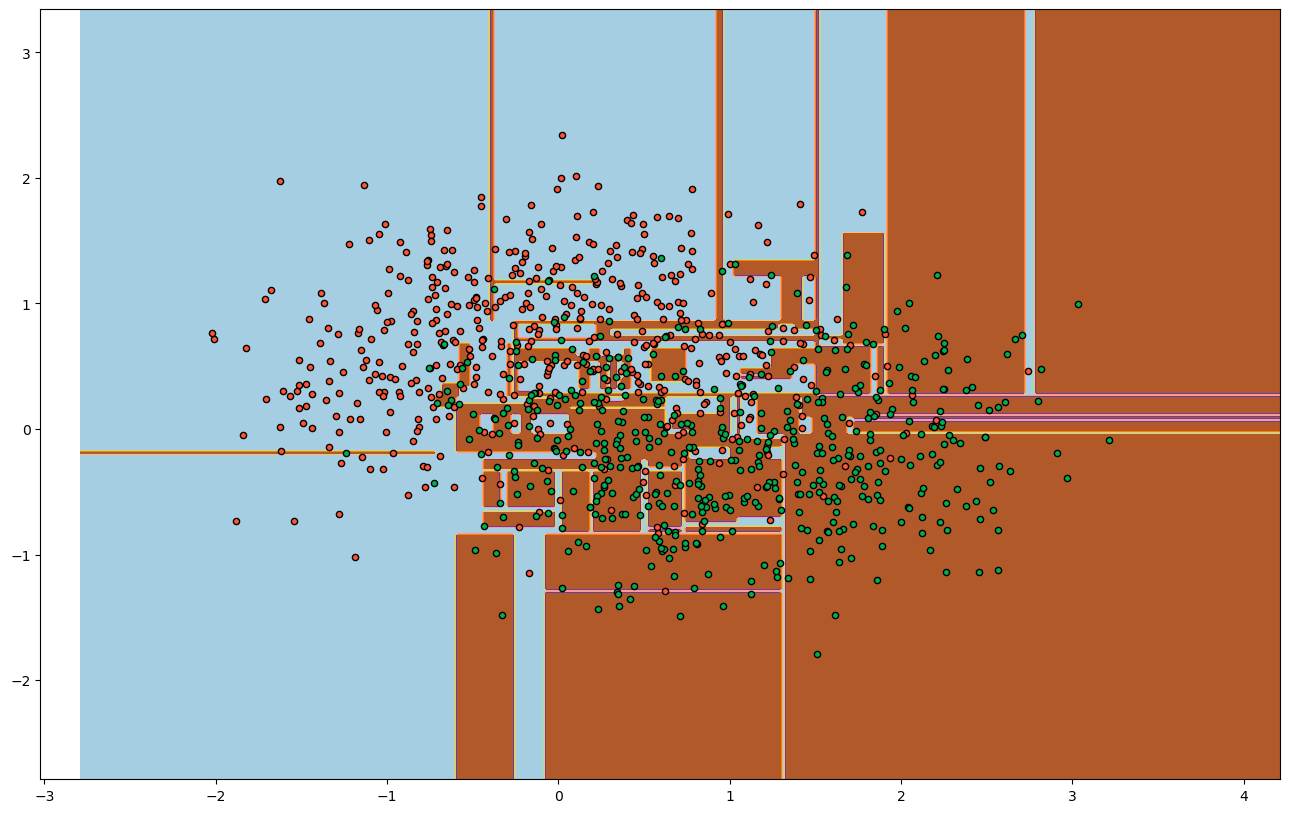

In [7]:
fig = plt.figure()
fig.set_size_inches(16, 10)


# границы признакового пространства
pixel_step = 0.02
X1_min, X1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
X2_min, X2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

# Генерация точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(X2_min, X1_max, pixel_step),
    np.arange(X2_min, X2_max, pixel_step),
)


# Даем прогноз для каждой точки
Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Раскрасим точки
cs = plt.contourf(xx1, xx2, Z, cmap = plt.cm.Paired)
plt.axis('tight')

for i, n, c in zip(range(2), decision_tree.classes_, ['#FF5533', '#00B050']):
    idx = np.where(Y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c = c,
        s = 20,
        edgecolor = 'k',
        label = 'Class %s' % n,
    )
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)
plt.show()

In [8]:
X_2, y_2 = X[: 500], Y[: 500]
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_2,y_2)

DecisionTreeClassifier()

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


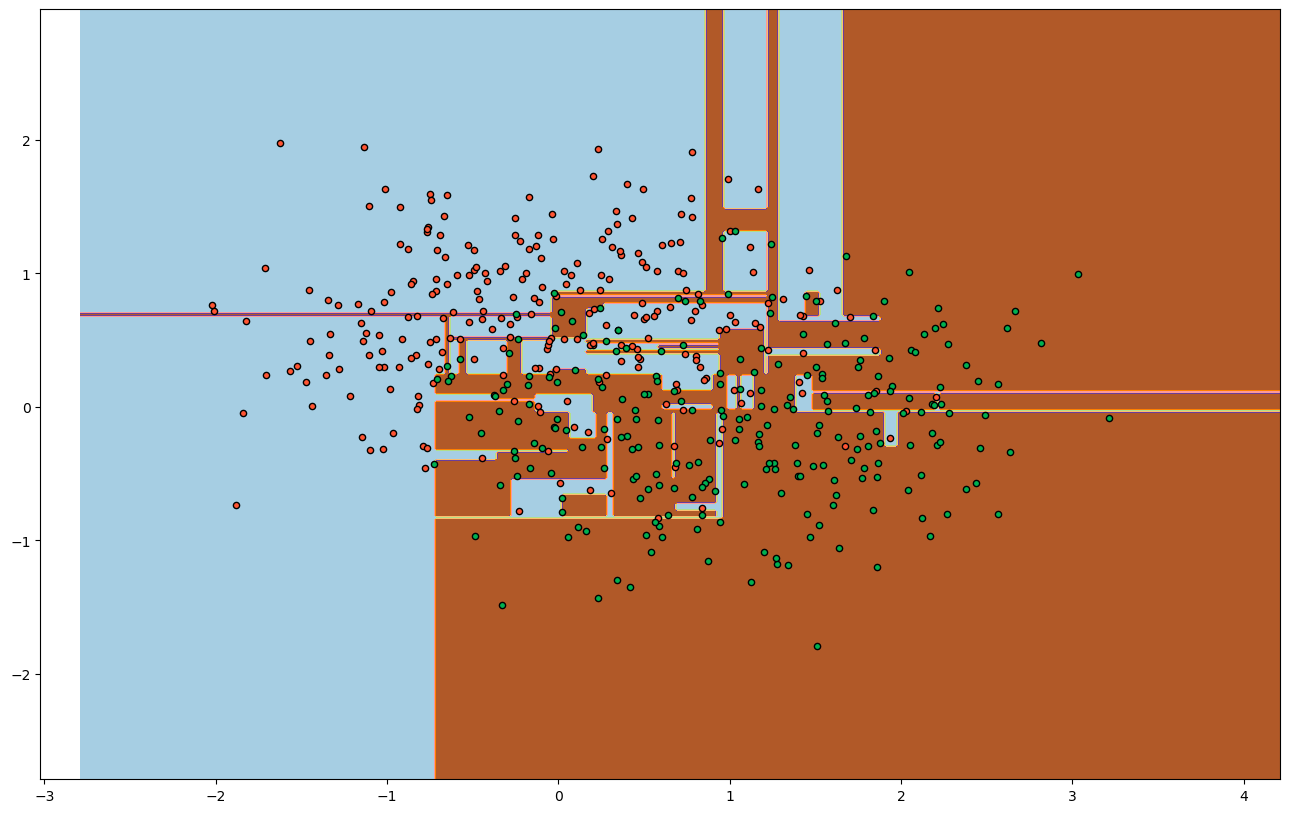

In [9]:
fig = plt.figure()
fig.set_size_inches(16, 10)


# границы признакового пространства
pixel_step = 0.02
X1_min, X1_max = X_2.values[:, 0].min() - 1, X_2.values[:, 0].max() + 1
X2_min, X2_max = X_2.values[:, 1].min() - 1, X_2.values[:, 1].max() + 1

# Генерация точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(X2_min, X1_max, pixel_step),
    np.arange(X2_min, X2_max, pixel_step),
)


# Даем прогноз для каждой точки
Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Раскрасим точки
cs = plt.contourf(xx1, xx2, Z, cmap = plt.cm.Paired)
plt.axis('tight')

for i, n, c in zip(range(2), decision_tree.classes_, ['#FF5533', '#00B050']):
    idx = np.where(y_2 == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c = c,
        s = 20,
        edgecolor = 'k',
        label = 'Class %s' % n,
    )
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)
plt.show()

accuracy равно 0.842


C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


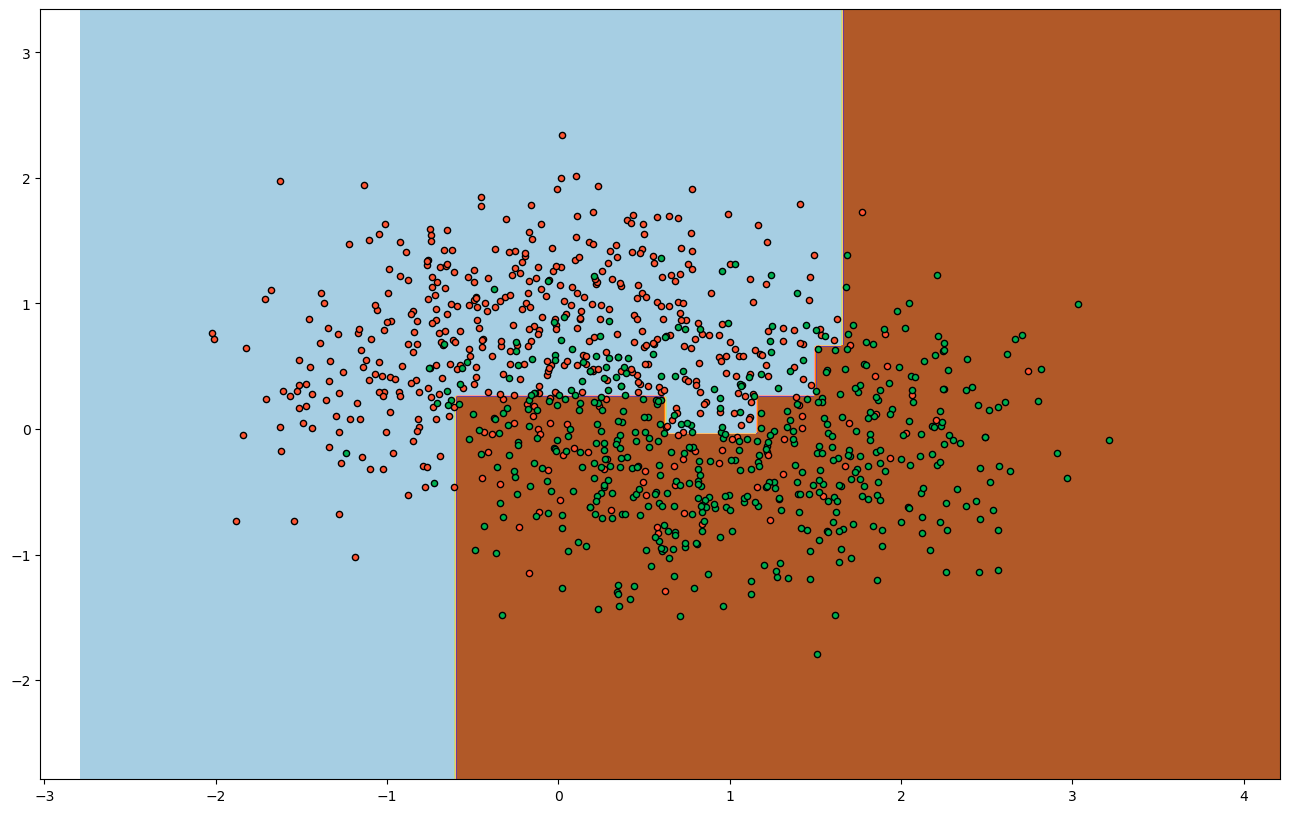

In [10]:
decision_tree = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5)
decision_tree.fit(X,Y)
print(f'accuracy равно {decision_tree.score(X, Y)}')
fig = plt.figure()
fig.set_size_inches(16, 10)


# границы признакового пространства
pixel_step = 0.02
X1_min, X1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
X2_min, X2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

# Генерация точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(X2_min, X1_max, pixel_step),
    np.arange(X2_min, X2_max, pixel_step),
)


# Даем прогноз для каждой точки
Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Раскрасим точки
cs = plt.contourf(xx1, xx2, Z, cmap = plt.cm.Paired)
plt.axis('tight')

for i, n, c in zip(range(2), decision_tree.classes_, ['#FF5533', '#00B050']):
    idx = np.where(Y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c = c,
        s = 20,
        edgecolor = 'k',
        label = 'Class %s' % n,
    )
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)
plt.show()

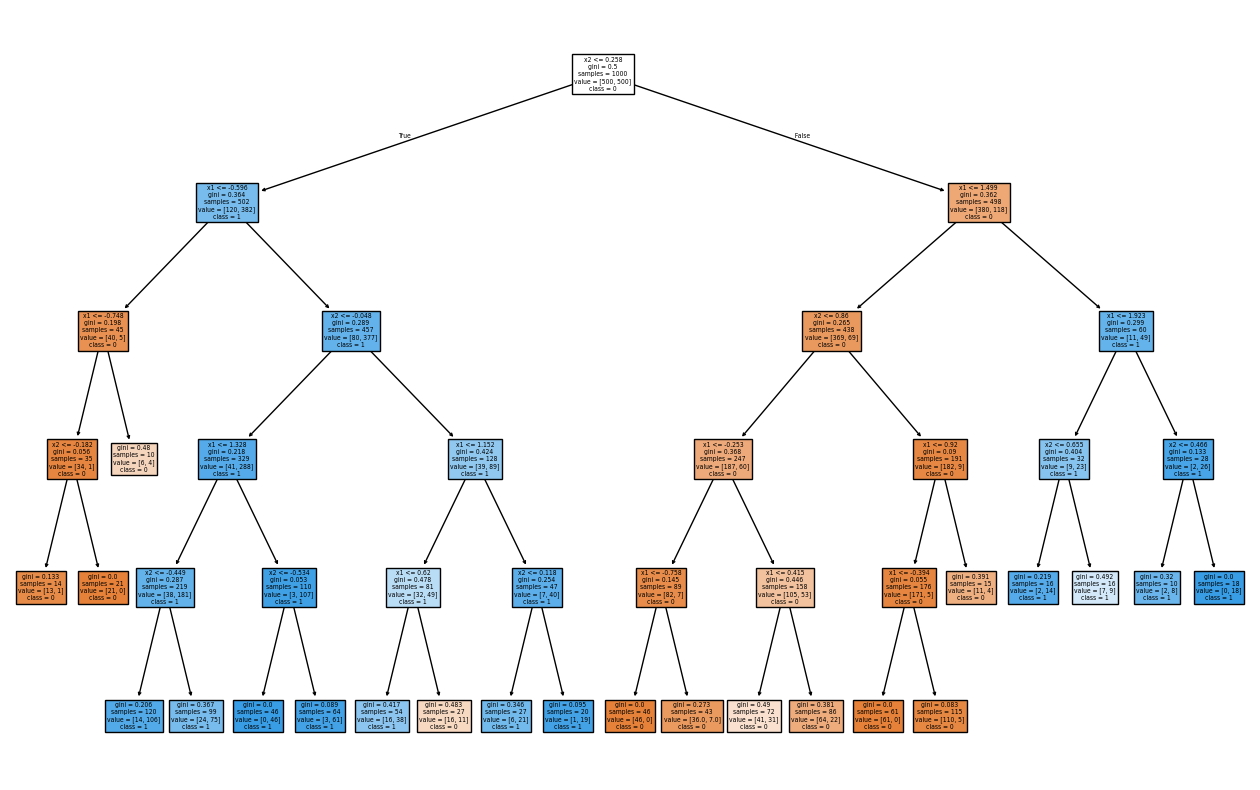

In [14]:
from sklearn import tree
decision_tree = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 10)
decision_tree.fit(X, Y)
fig = plt.figure()
fig.set_size_inches(16,10)
tree.plot_tree(decision_tree, 
               feature_names = X.columns, 
               class_names = decision_tree.classes_.astype(int).astype(str),
              filled = True)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size = 0.3,
                                                   random_state = 0)
decision_tree = DecisionTreeClassifier(max_depth = 100, min_samples_leaf = 1)
decision_tree.fit(X_train, y_train)
print(f'Accuracy на тренировочной выборке равно {round(decision_tree.score(X_train, y_train),3)}')
print(f'Accuracy на тестовой выборке равно {round(decision_tree.score(X_test, y_test),3)}')

Accuracy на тренировочной выборке равно 1.0
Accuracy на тестовой выборке равно 0.773


C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


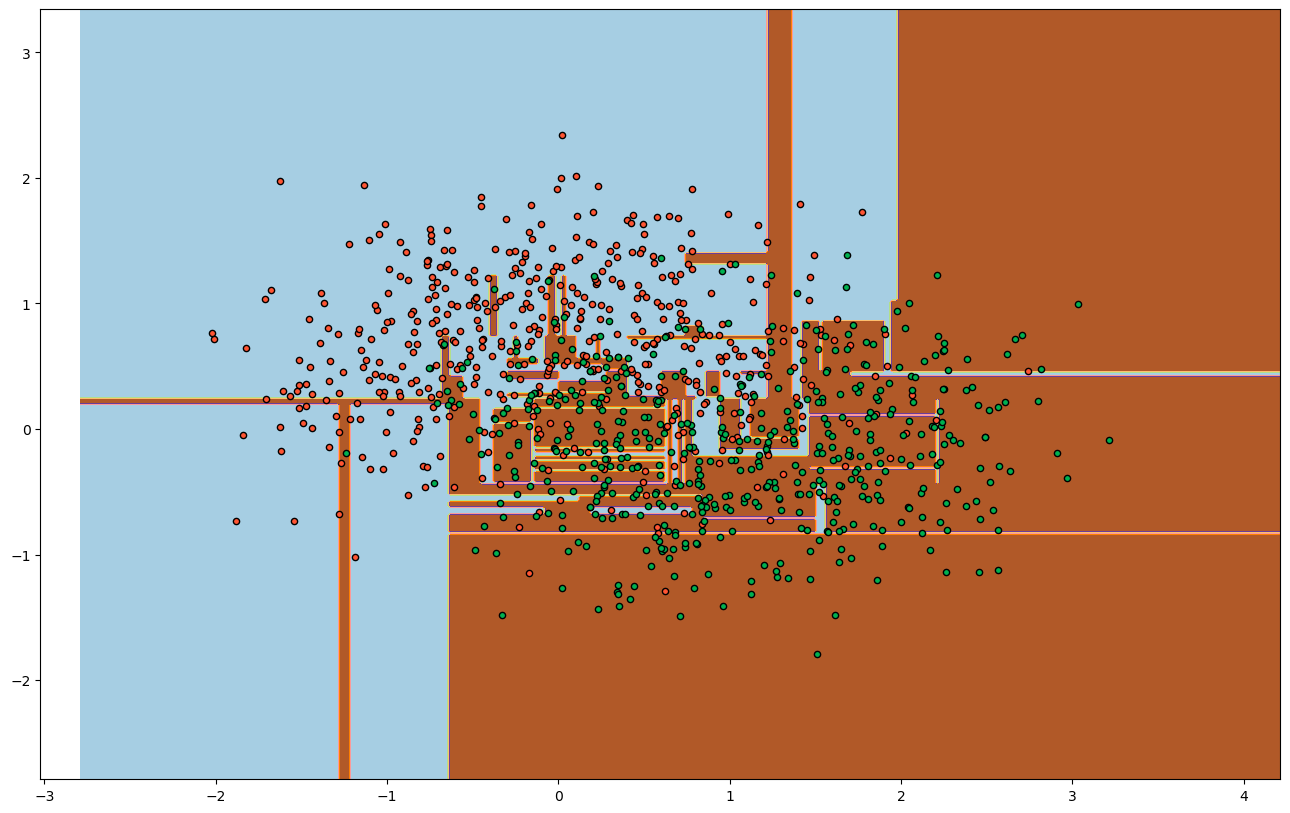

In [28]:
fig = plt.figure()
fig.set_size_inches(16,10)

# границы признакового пространства
pixel_step = 0.02
X1_min, X1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
X2_min, X2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

# Генерация точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(X2_min, X1_max, pixel_step),
    np.arange(X2_min, X2_max, pixel_step),
)


# Даем прогноз для каждой точки
Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Раскрасим точки
cs = plt.contourf(xx1, xx2, Z, cmap = plt.cm.Paired)
plt.axis('tight')

for i, n, c in zip(range(2), decision_tree.classes_, ['#FF5533', '#00B050']):
    idx = np.where(Y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c = c,
        s = 20,
        edgecolor = 'k',
        label = 'Class %s' % n,
    )
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)
plt.show()

In [29]:
def new_feature(x1, x2):
    return 2*x1**3 - 3*x1**2 - x1 - x2

X_new = X.copy()
X_new['new_feature'] = new_feature(X.values[:,0], X.values[:,1])
X_new.head()

,x1,x2,new_feature
0,2.216430,0.741684,4.080901
1,2.057427,0.424853,2.236898
2,-0.116847,0.004159,0.068537
3,-0.710797,0.210482,-1.733619
4,0.267548,-0.460654,0.016663


In [30]:
# Для кастомного автоматического преобразования данных нужно использовать кастомный трансформер, 
# который будет использоваться для масштабирования данных в пайплайне
# fit, transform, fit_transform
# Нужно наследоваться от BaseEstimator и TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print('Класс проинициализирован!')

    def fit(self, X, y = None):
        print('Зафитили датасет!')
        return self

    def transform(self, X, y = None):
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis = 1)
        print('Датасет трансформирован!')
        return X_

In [32]:
custom_class = CustomFunctionTransformer("x1", "x2",
                                         lambda x,y: 2*x**3 - 3*x**2 - x - y)
custom_class.fit(X)
custom_class.transform(X)

Класс проинициализирован!
Зафитили датасет!
Датасет трансформирован!


,new_feature
0,4.080901
1,2.236898
2,0.068537
3,-1.733619
4,0.016663
...,...
995,-1.345270
996,-1.256273
997,0.394222
998,-0.610251


In [34]:
custom_class.fit_transform(X)

Зафитили датасет!
Датасет трансформирован!


,new_feature
0,4.080901
1,2.236898
2,0.068537
3,-1.733619
4,0.016663
...,...
995,-1.345270
996,-1.256273
997,0.394222
998,-0.610251


In [35]:
custom_class.get_params()

{'first_col': 'x1',
 'function': <function __main__.<lambda>(x, y)>,
 'second_col': 'x2'}

In [48]:
# Используем кастомный трансформер в пайплайне
from sklearn.pipeline import Pipeline
pipe = Pipeline([('custom_transformer', CustomFunctionTransformer("x1", "x2", lambda x,y: 2*x**3 - 3*x**2 - x - y)),
                ('decision_tree', DecisionTreeClassifier(max_depth = 2))])
pipe.fit(X, Y)

Класс проинициализирован!
Зафитили датасет!
Датасет трансформирован!


Pipeline(steps=[('custom_transformer',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function <lambda> at 0x000002006A3191C0>,
                                           second_col='x2')),
                ('decision_tree', DecisionTreeClassifier(max_depth=2))])

Датасет трансформирован!


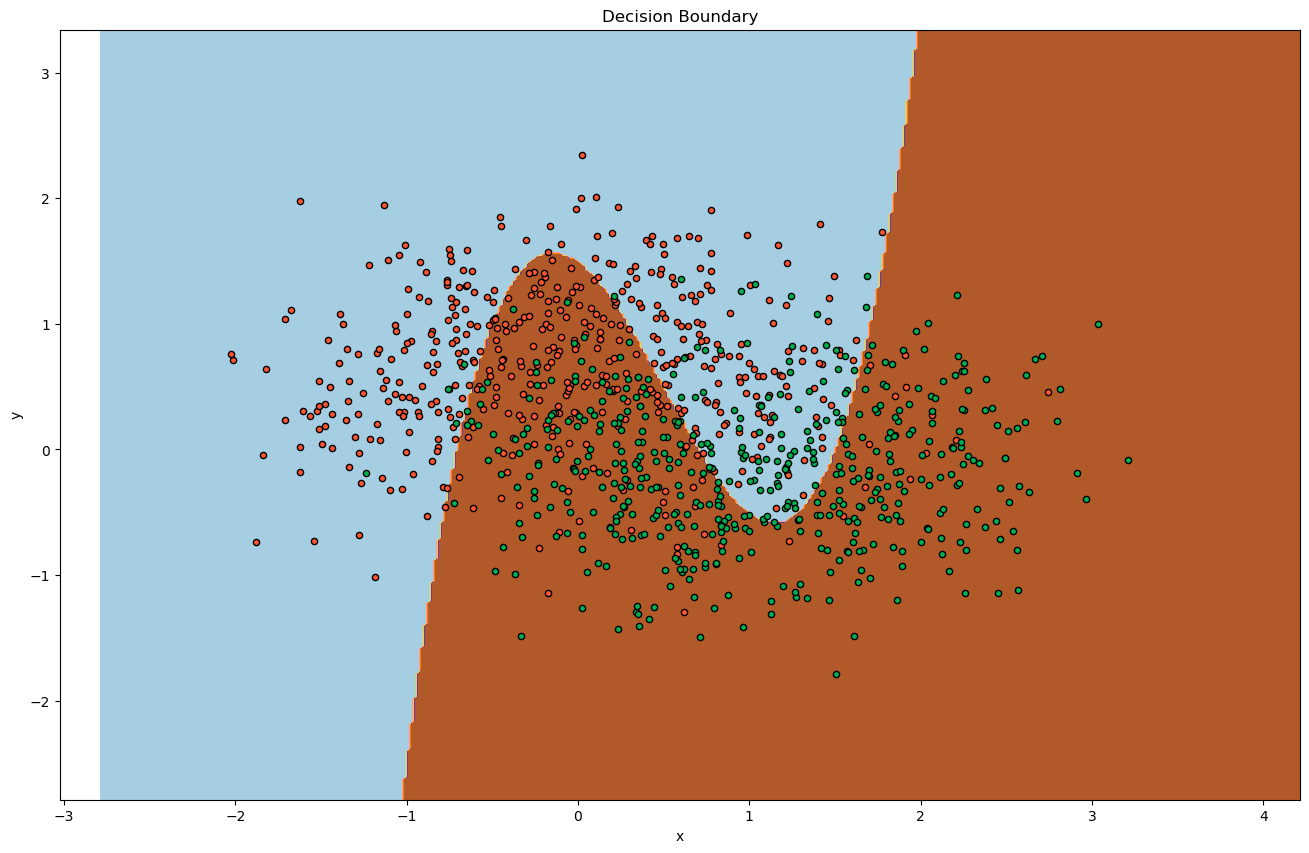

In [49]:
fig = plt.figure()
fig.set_size_inches(16,10)

# границы признакового пространства
pixel_step = 0.02
X1_min, X1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
X2_min, X2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

# Генерация точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(X2_min, X1_max, pixel_step),
    np.arange(X2_min, X2_max, pixel_step),
)


# Даем прогноз для каждой точки
Z = pipe.predict(pd.DataFrame(np.c_[xx1.ravel(), xx2.ravel()],
                             columns = ['x1', 'x2']))
Z = Z.reshape(xx1.shape)

# Раскрасим точки
cs = plt.contourf(xx1, xx2, Z, cmap = plt.cm.Paired)
plt.axis('tight')

for i, n, c in zip(range(2), pipe.classes_, ['#FF5533', '#00B050']):
    idx = np.where(Y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c = c,
        s = 20,
        edgecolor = 'k',
        label = 'Class %s' % n,
    )
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
plt.show()

In [50]:
pipe.score(X, Y)

Датасет трансформирован!


0.723